# Исследование данных о продажах игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**План работы:**
1. **Ознакомление с датасетом**  
    
    
2. **Подготовка данных:**  
    - приведение названий столбцов к однообразному виду;
    - работа с типами данных в датасете;
    - обработка пропусков;
    - подсчет суммарных продаж во всех регионах
    
    
3. **Исследовательский анализ данных:** 

        
4. **Составление портрета пользователя каждого региона:**  
    Определение для пользователя каждого региона:
    - топ-5 популярных платформ;
    - топ-5 популярных жанров;
    - влияние рейтинга ESRB на продажи (по регионам)
    
    
5. **Проверка гипотез**  

### Ознакомление с датасетом

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


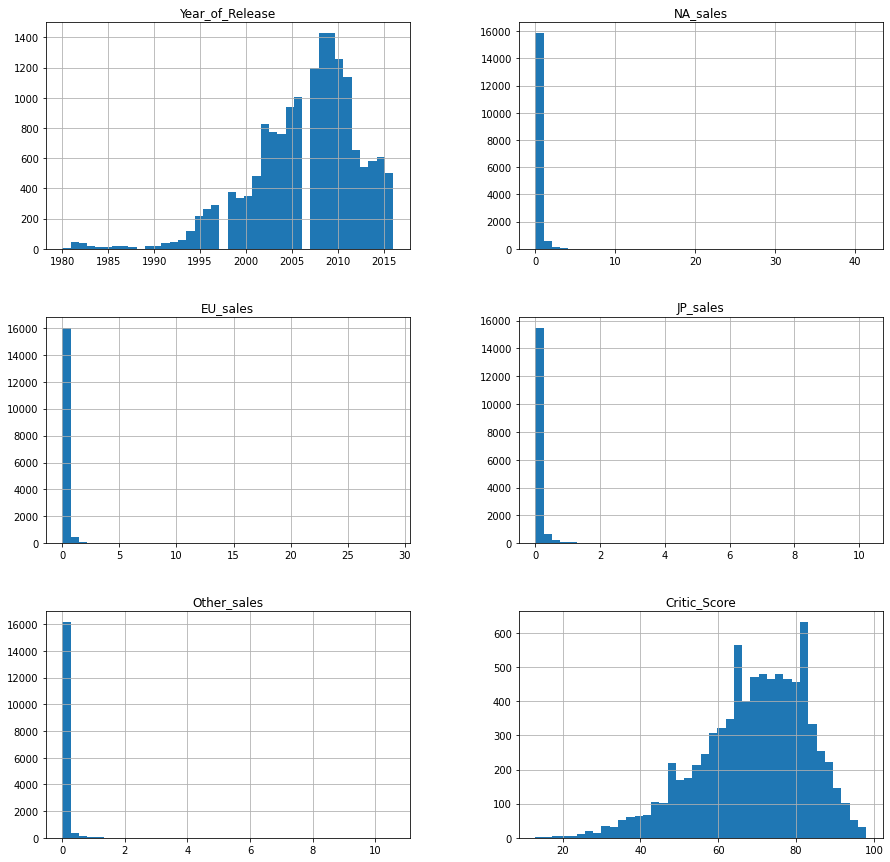

In [4]:
data.hist(figsize=(15,15),bins=40);

### Подготовка данных

Приведем названия столбцов к нижнему регистру.

In [5]:
data.columns = map(str.lower, data.columns)

#### Работа пропусками

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах с оценками и могут быть вызваны техническим (данные были утеряны в ходе работы с ними в связи с тех. неполадками) или человеческим фактором (пользователь сыграл недостаточное количество часов). Также, касательно стобца **critic_score**, пропуск может означать, например, что критики еще не оценили игру (такие пропуски заполним нулевыми значениями для удобства).

In [7]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tbd' в столбце с рейтингом пользователей **user_score** расшифровывается как "to be determined" и означает, что пользователь провел в игре недостаточно времени, чтобы получить оценку. Так как 'tbd' фактически означает, что оценки нет, можно заменить значение на -1. Аналогично поступим с другими пропусками в этом столбце.

In [9]:
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

Рассмотрим столбец **rating**:

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски в этом столбце также могут быть вызваны как техническим фактором, так и тем, что ESRB не присвоила игре рейтинг. Пропуски в этом столбце заполним строкой 'unknown'.

In [11]:
data['rating'] = data['rating'].fillna('unknown')

Что касается действительно странных пропусков, так это пропуски в столбцах **name**, **genre** и **year_of_release**. Таких пропусков немного и они однозначно возникли по техническим причинам. Можно избавиться от строк, в которых эти значения пропущены, так как их не очень много и корректно заполнить пропуски невозможно.

In [12]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

#### Работа с типами данных

В столбце **year_of_release** тип данных заменим на 'int', так как год - целое число. Тип datetime было бы целесообразно использовать, если бы были данные не только о годе выпуска.

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

В столбце **user_score** целесообразно использовать тип float. В столбце **critic_score** же целесообразно использовать тип int, так как критики выставляют оценку в виде целого числа от 1 до 100.

In [14]:
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].astype('int')

#### Добавление столбца sales_sum

Создадим столбец **sales_sum** для суммарных значений продаж игр по всем регионам.

In [15]:
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sales_sum        16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных

#### Продажи и актуальный период

Посмотрим, сколько игр выпускалось в разные годы.

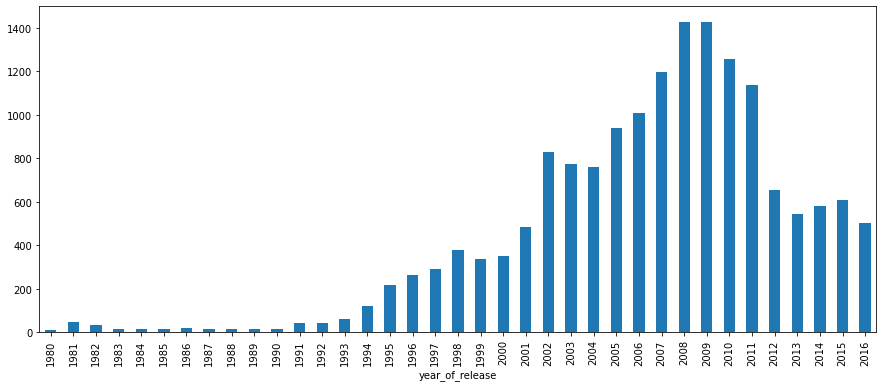

In [17]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(15,6));

Посмотрим, как менялись продажи по платформам по годам.

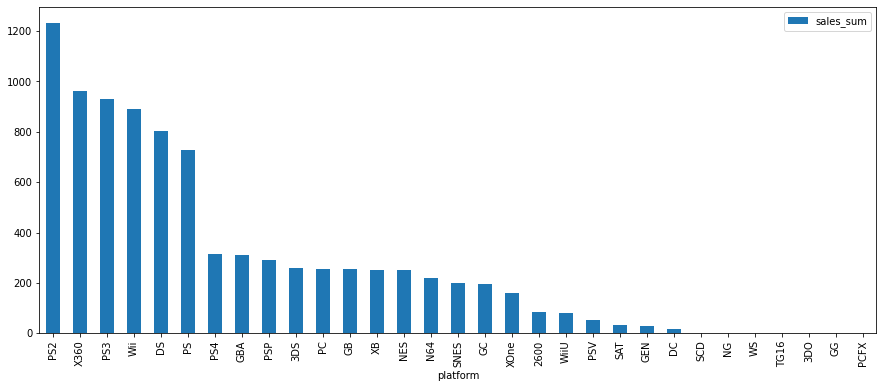

In [18]:
data_platform = (data.pivot_table(index='platform', values='sales_sum', aggfunc='sum')
                 .sort_values(by='sales_sum', ascending=False)
                )
data_platform.plot(kind='bar',figsize=(15,6));

Отберем из всех платформ топ-10 по продажам и построим графики **продаж по годам** для этих 10 платформ.

In [19]:
data_platform_top = list(data_platform.index[0:9])

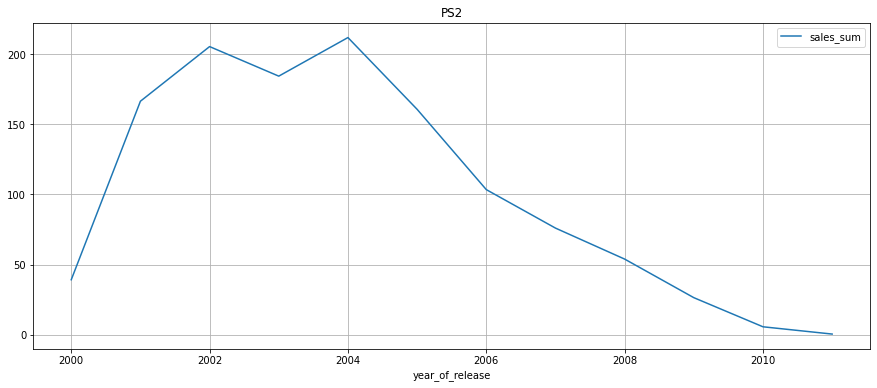

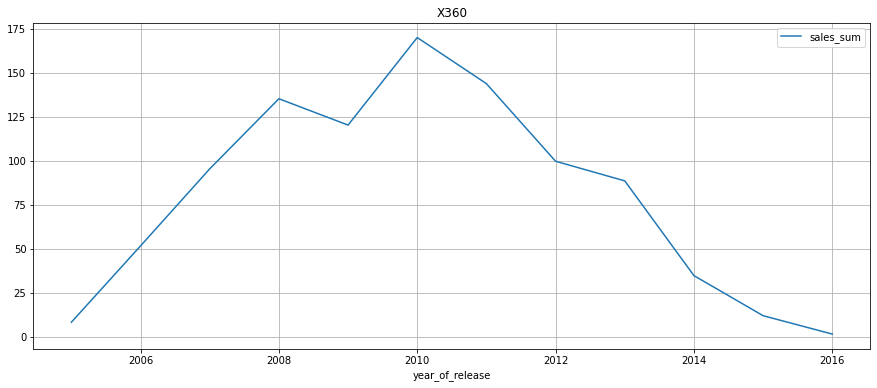

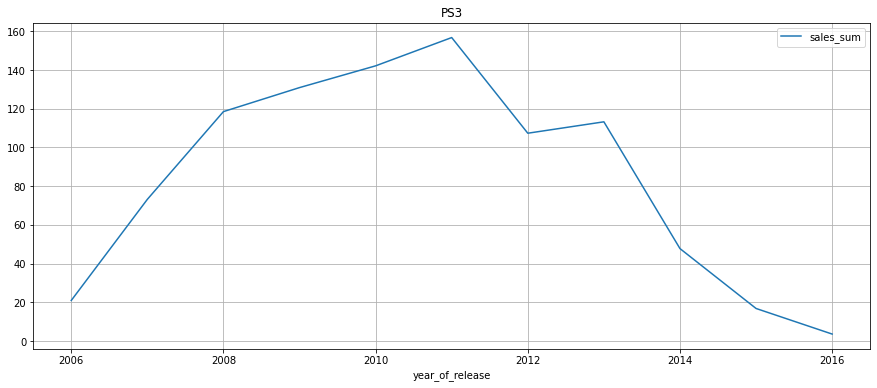

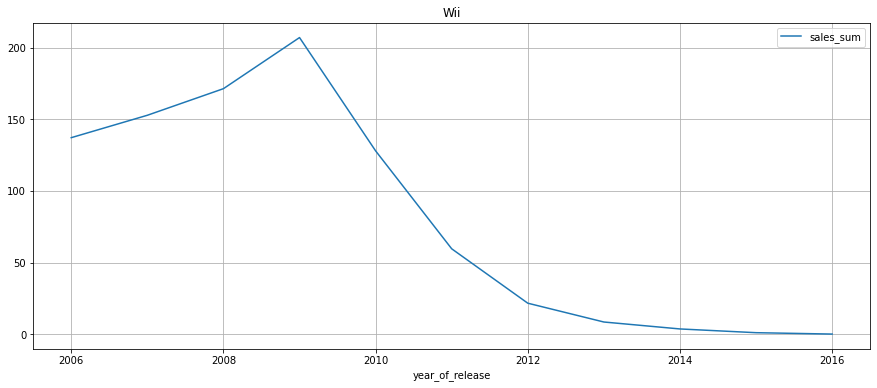

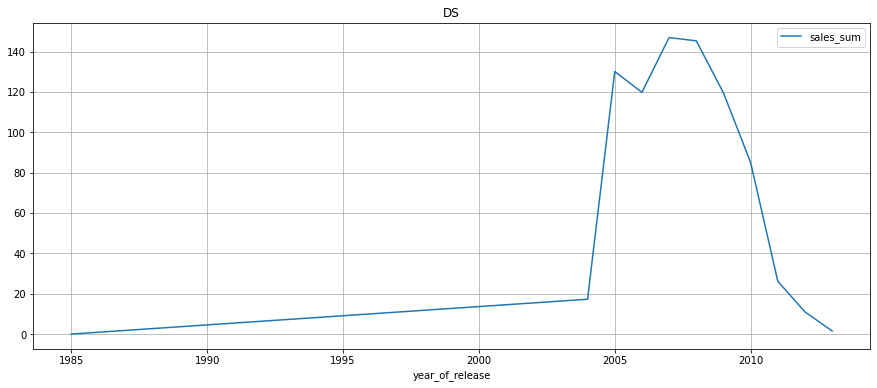

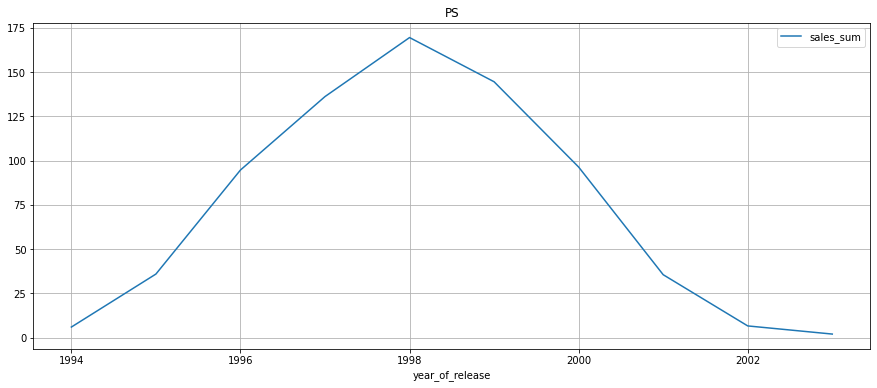

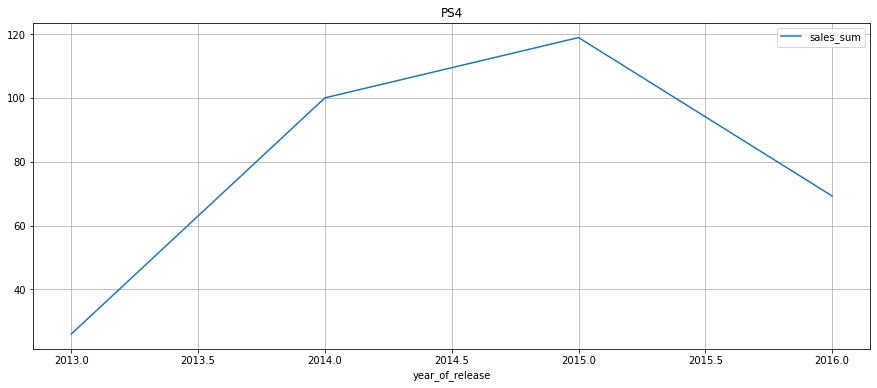

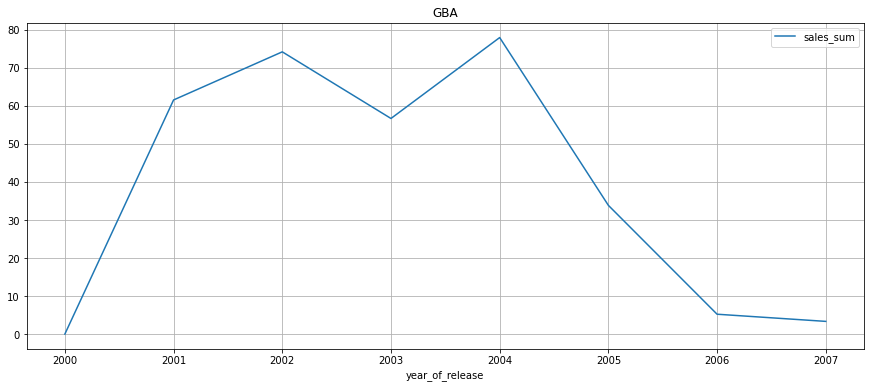

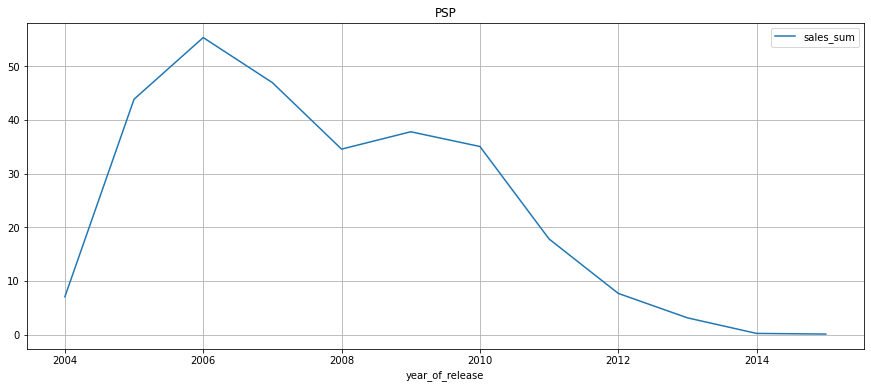

In [20]:
for name in data_platform_top:
    (data[data['platform']==name]
    .pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(figsize=(15,6),title=name, grid=True))

Посчитаем **среднюю "продолжительность жизни" платформы** по 10 платформам с самыми большими объемами продаж.

In [21]:
platform_birth = 0
platform_death = 0
platform_lifecycle = []
for name in data_platform_top:
    platform_death = data.loc[data['platform'] == name, 'year_of_release'].max()
    platform_birth = data.loc[data['platform'] == name, 'year_of_release'].min()
    platform_lifecycle.append(platform_death - platform_birth)
    
pd.Series(platform_lifecycle).mean()


11.11111111111111

Получается, что **платформа находится на рынке в среднем 11 лет**. Причем, примерно **половину жизненного цикла** продажи платформы растут. Вместо 5,5 лет возьмем **5 лет**, так как данные представлены по годам, а не по полугодиям. Этим сроком будем определять **актуальный период**, который войдет в исследование (с 2012 по 2016 год). 

#### Перспективные платформы

Посмотрим на **продажи по платформам за актуальный период.**

In [22]:
data = data.query('year_of_release > 2011')

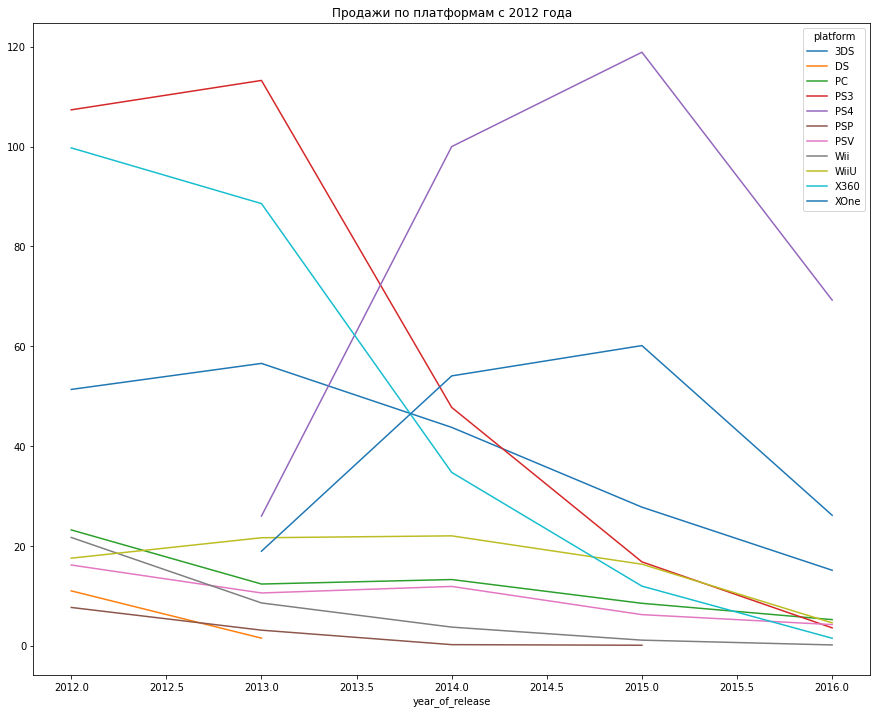

In [23]:
(data.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum')
 .plot(figsize=(15,12),title='Продажи по платформам с 2012 года'));

Как видно на графике, за последние годы суммарные продажи по платформам уменьшились по всем платформам. Несмотря на сильное падение по сравнению с 2015 годом, лидируют по продажам PS4, XOne и 3DS. **Перспективными можно назвать платформы PS4 и XOne, так как они самые новые и прибыльные одновременно.**

#### Ящик с усами

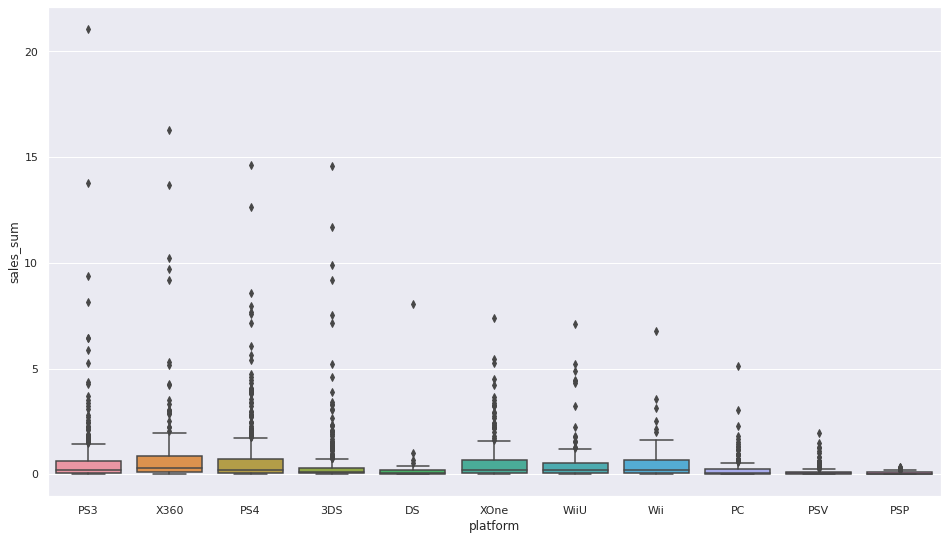

In [24]:
sns.set(rc={'figure.figsize':(16,9)})
sns.boxplot(data=data, x='platform', y='sales_sum');


Выбросы не позволяют масштабировать график так, чтобы можно было разглядеть его. Построим доп. график без мешающих выбросов.

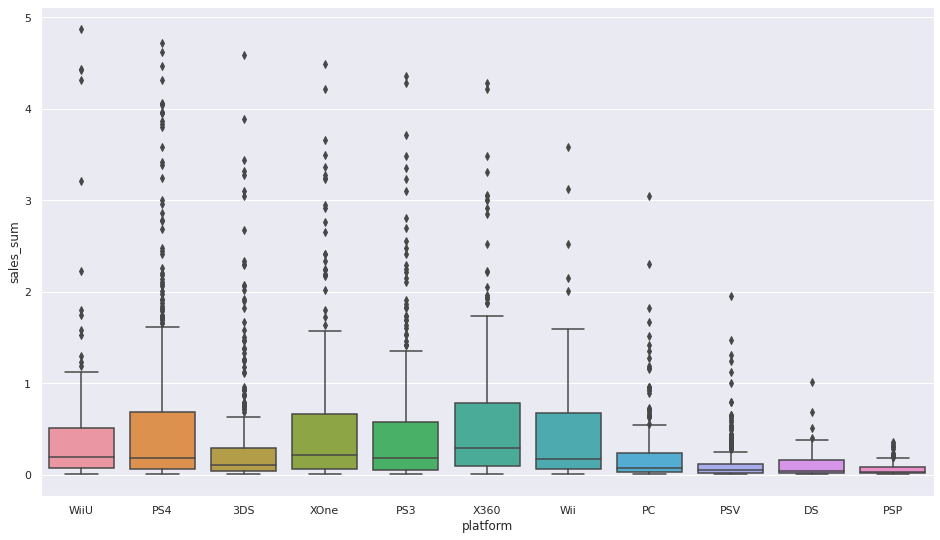

In [25]:
sns.set(rc={'figure.figsize':(16,9)})
sns.boxplot(data=data.query('sales_sum < 5'), x='platform', y='sales_sum');

По графику можно сказать, что медианные значения продаж на XOne, X360 и PS4 достаточно близки. Также эти 3 платформы **выделяюся дороговизной игр** среди других.

#### Отзывы и продажи

- Рассмотрим взаимосвязь отзывов критиков и пользователей с продажами для платформы **PS4**.

In [26]:
data_ps4 = data.query('(platform == "PS4")&(critic_score >= 0)&(user_score >= 0)')

data_ps4['critic_score'].corr(data_ps4['sales_sum'])

0.40589480145836687

In [27]:
data_ps4['user_score'].corr(data_ps4['sales_sum'])

-0.03362497596528878

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


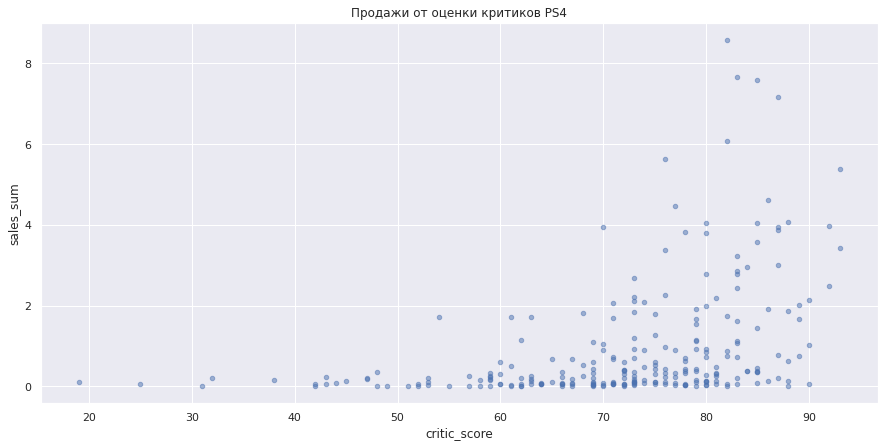

In [28]:
(data_ps4.query('sales_sum <10')
 .plot(kind='scatter',x='critic_score', y='sales_sum', figsize=(15,7),alpha=0.5, title='Продажи от оценки критиков PS4'));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


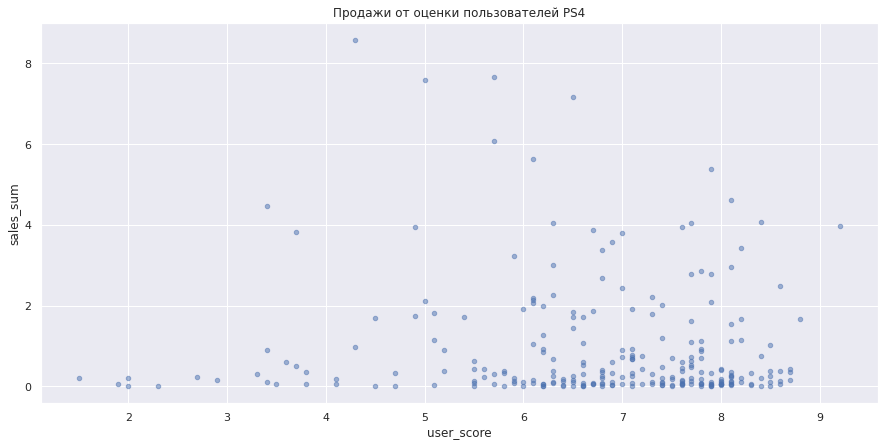

In [29]:
(data_ps4.query('sales_sum <10')
 .plot(kind='scatter', x='user_score', y='sales_sum', figsize=(15,7),alpha=0.5, title='Продажи от оценки пользователей PS4'));

Судя по коэффициентам корреляции, между оценками критиков и продажами PS4 существует **слабая прямая взаимосвязь**, а между оценками игроков и продажами - **корреляции практически нет**.

- Рассмотрим взаимосвязь отзывов критиков и пользователей с продажами для платформы **XOne**.

In [30]:
data_xone = data.query('(platform == "XOne")&(critic_score >= 0)&(user_score >= 0)')

data_xone['critic_score'].corr(data_xone['sales_sum'])

0.41042203561296375

In [31]:
data_xone['user_score'].corr(data_xone['sales_sum'])

-0.09400318326920852

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


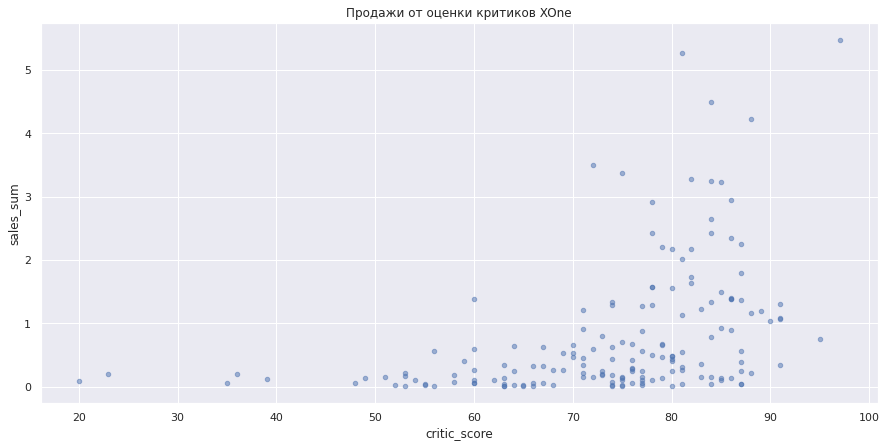

In [32]:
(data_xone.query('sales_sum <10')
 .plot(kind='scatter',x='critic_score', y='sales_sum', figsize=(15,7),alpha=0.5, title='Продажи от оценки критиков XOne'));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


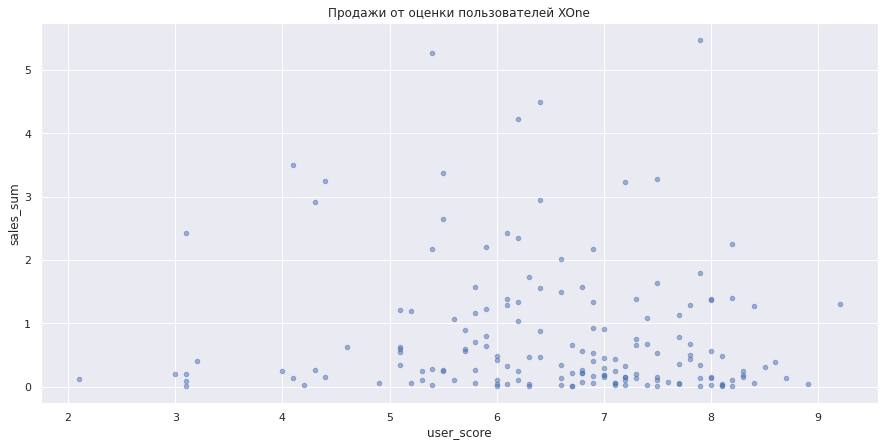

In [33]:
(data_xone.query('sales_sum <10')
 .plot(kind='scatter', x='user_score', y='sales_sum', figsize=(15,7),alpha=0.5, title='Продажи от оценки пользователей XOne'));

Судя по коэффициентам корреляции, между оценками критиков и продажами XOne существует **слабая прямая взаимосвязь**, а между оценками игроков и продажами - **очень слабая обратная взаимосвязь**.

- Рассмотрим взаимосвязь отзывов критиков и пользователей с продажами для платформы **X360**.

In [34]:
data_x360 = data.query('(platform == "X360")&(critic_score >= 0)&(user_score >= 0)')

data_x360['critic_score'].corr(data_x360['sales_sum'])

0.3605734888507336

In [35]:
data_x360['user_score'].corr(data_x360['sales_sum'])

-0.0020140394826897853

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


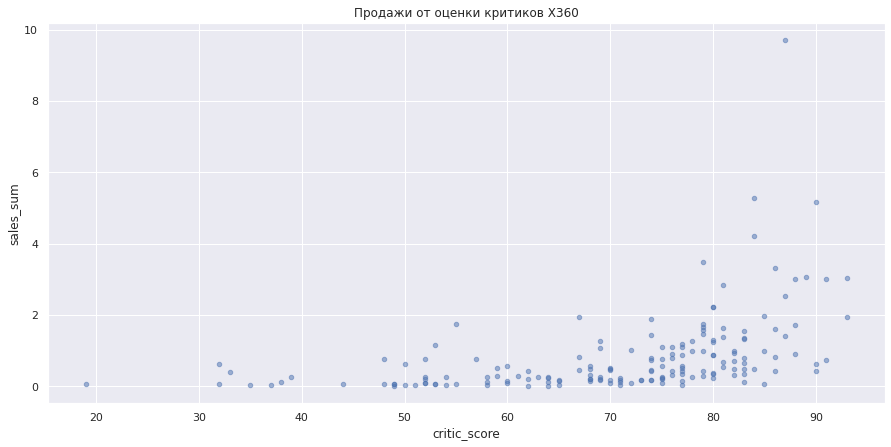

In [36]:
(data_x360.query('sales_sum <10')
 .plot(kind='scatter',x='critic_score', y='sales_sum', figsize=(15,7),alpha=0.5, title='Продажи от оценки критиков X360'));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


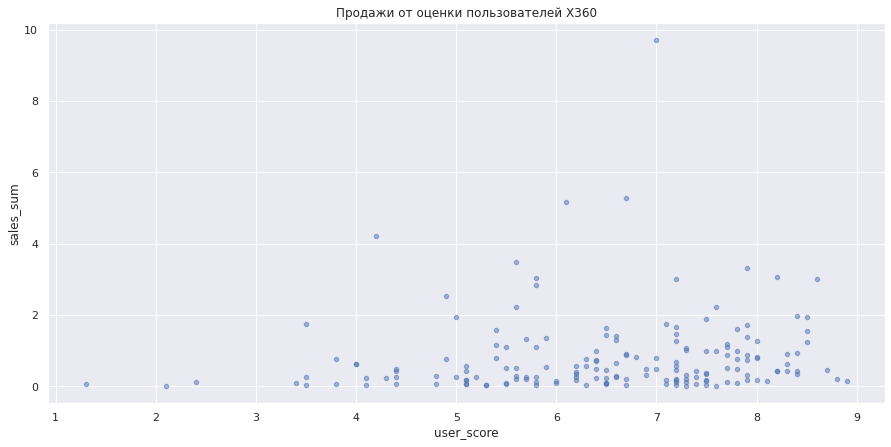

In [37]:
(data_x360.query('sales_sum <10')
 .plot(kind='scatter', x='user_score', y='sales_sum', figsize=(15,7),alpha=0.5, title='Продажи от оценки пользователей X360'));

Судя по коэффициентам корреляции, между оценками критиков и продажами X360 существует **слабая прямая взаимосвязь**, а между оценками игроков и продажами - **корреляции практически нет**.

**Вывод:** на основе данных о трех популярных платформах, в случае с каждой платформой, между **оценками критиков и продажами** существует **слабая прямая взаимосвязь**, а между **оценками игроков и продажами** - **корреляции практически нет или взаимосвязь очень слабая**.

#### Игры по жанрам

Посмотрим, как игры распределены по жанрам.

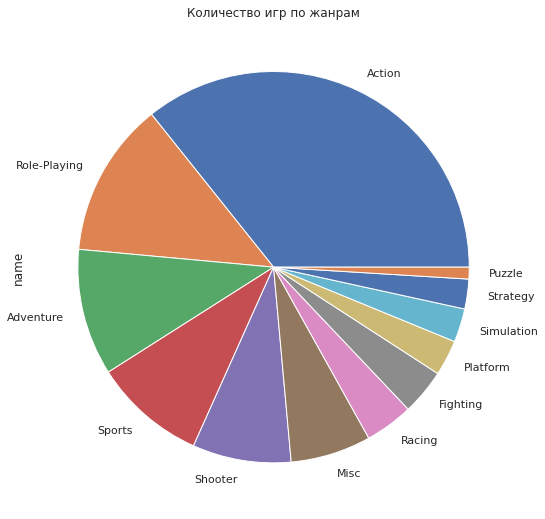

In [38]:
data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='pie', title='Количество игр по жанрам');

Как видно на диаграмме, **самый крупный** в количественном соотношении **жанр - экшен**, за ним следуют role-playing игры и приключенческие игры. **Менее всего представлены** симуляции, стратегии и **пазлы**.

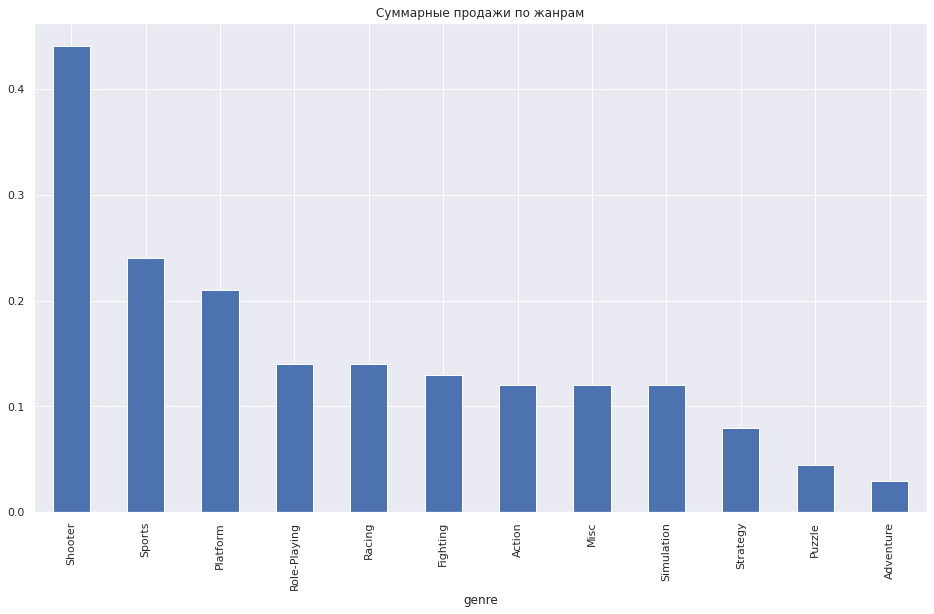

In [39]:
data.groupby('genre')['sales_sum'].median().sort_values(ascending=False).plot(kind='bar',title='Суммарные продажи по жанрам');

**По медианным продажам лидирует** жанр шутеров, за ним следуют спортивные игры и игры-платформеры (несмотря на отсутствие в топе по количеству игр). 

**Хуже всего продаются** приключенческие игры, пазлы и стратегии.

### Портрет пользователя

#### Северная Америка (NA)

Посмотрим, какие платформы лидируют по продажам в Северной Америке.

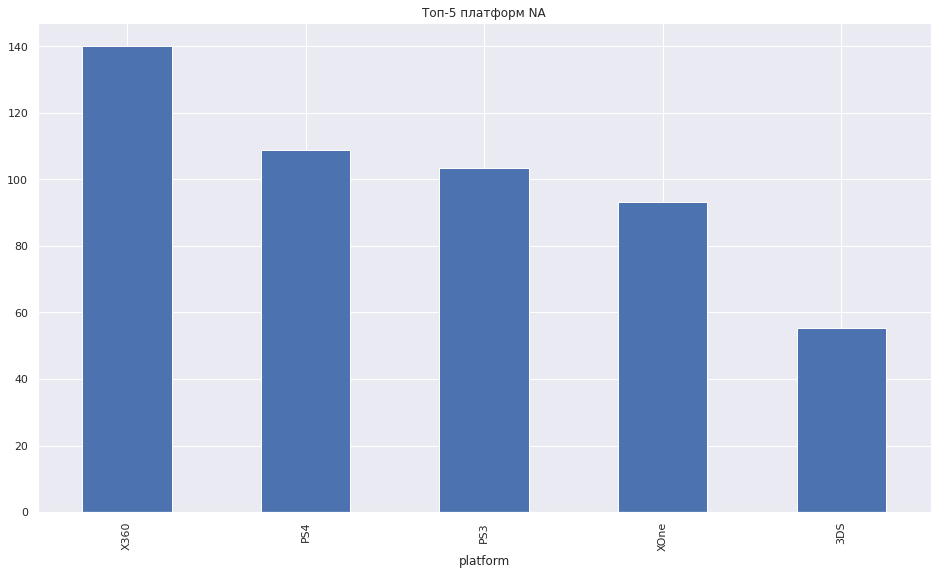

In [40]:
data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='bar',title='Топ-5 платформ NA');

**Топ-5 платформ в Северной Америке:**
1. X360
2. PS4
3. PS3
4. XOne
5. 3DS

Посмотрим на распределение продаж по жанрам.

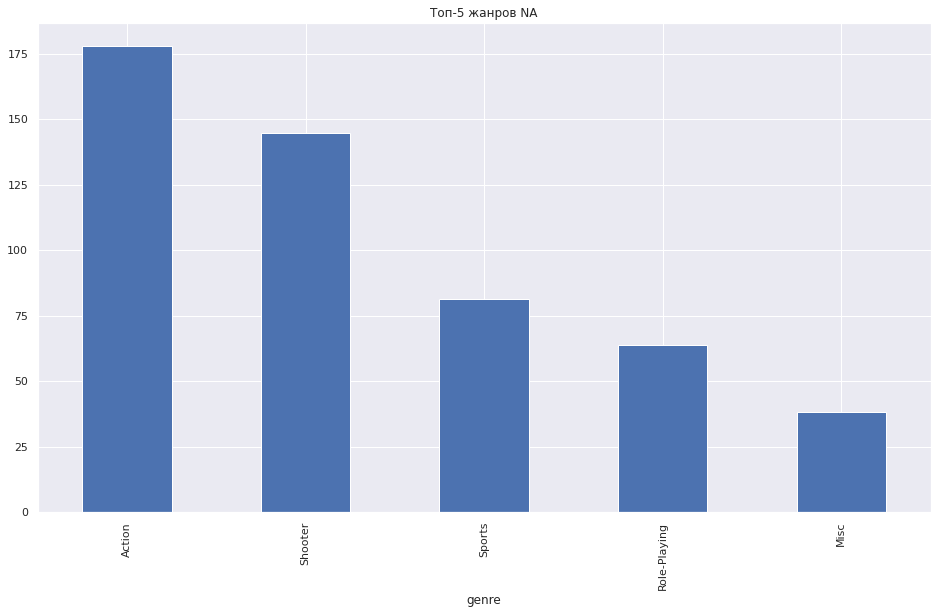

In [41]:
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='bar',title='Топ-5 жанров NA');

**Топ-5 жанров в Северной Америке:**
1. Action
2. Shooter
3. Sports
4. Role-Playing 
5. Misc

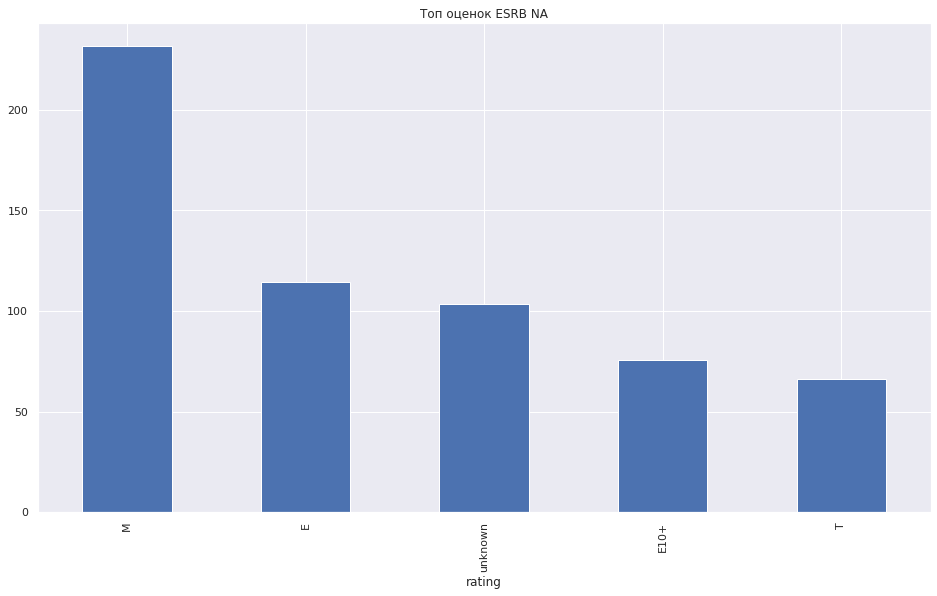

In [42]:
data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar',title='Топ оценок ESRB NA');

Лидируют по продажам игры для взрослых от 17 лет и игры для всех. В конце списка игры для подростков.

**Портрет пользователя из Северной Америки** - человек старше 17 лет, играющий на X360 в экшен-игры.

#### Европа (EU)

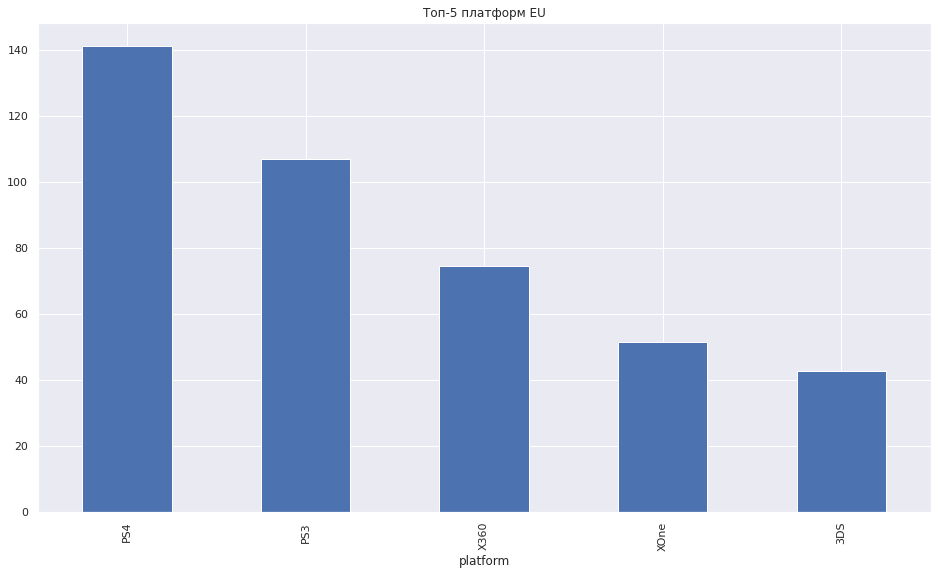

In [43]:
data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='bar',title='Топ-5 платформ EU');

**Топ-5 платформ в Европе:**
1. PS4
2. PS3
3. X360
4. XOne
5. 3DS

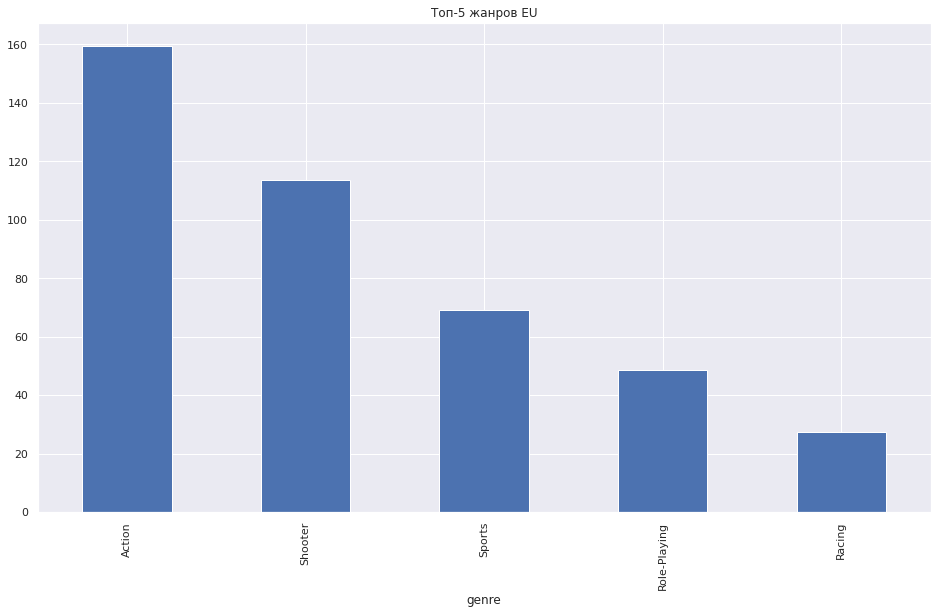

In [44]:
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='bar',title='Топ-5 жанров EU');

**Топ-5 жанров в Европе:**
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

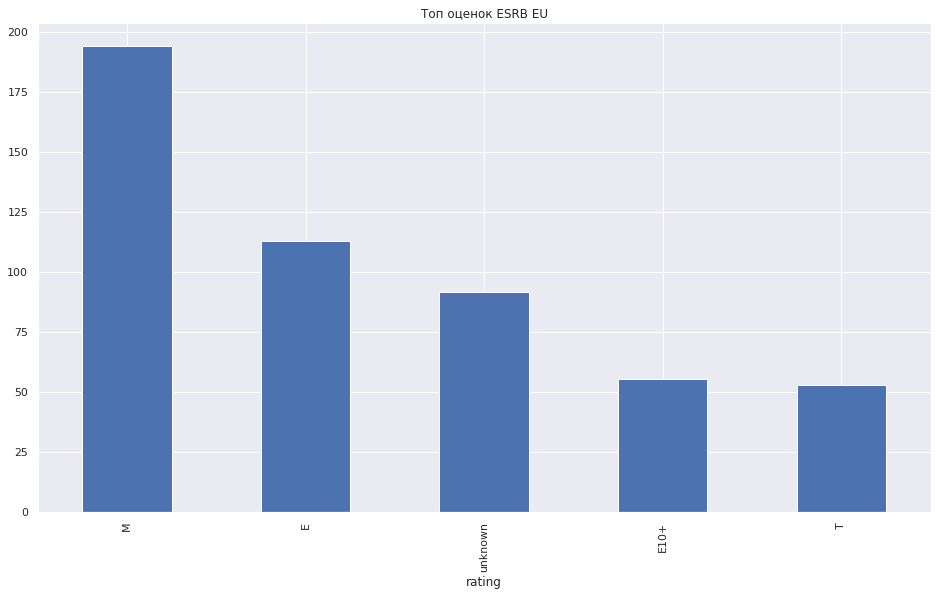

In [45]:
data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar',title='Топ оценок ESRB EU');

Лидируют по продажам игры для взрослых и для всех. В конце списка игры для детей от 10 лет и игры для подростков.

**Портрет пользователя из Европы** - человек от 17 лет, играющий на PS4 в экшен-игры.

#### Япония (JP)

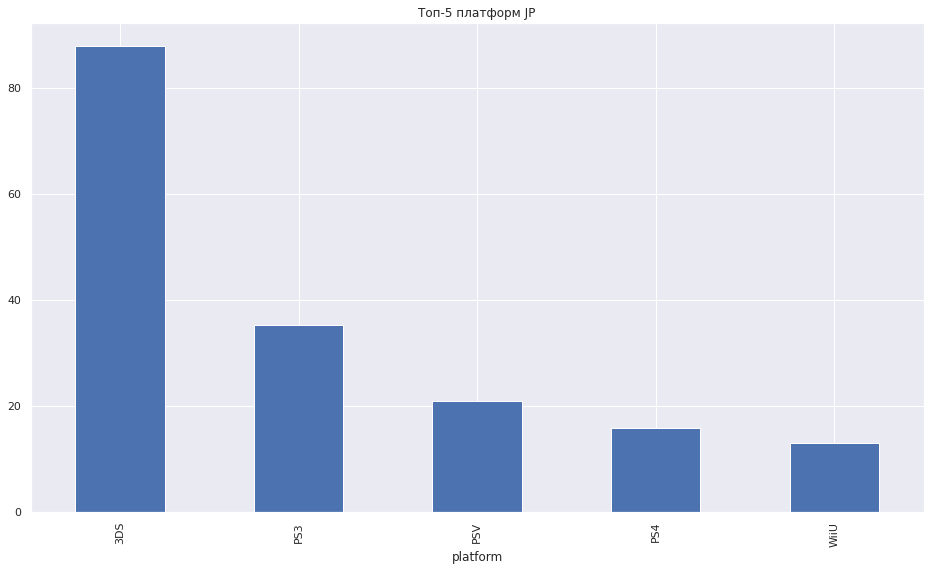

In [46]:
data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='bar',title='Топ-5 платформ JP');

**Топ-5 платформ в Японии:**
1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU

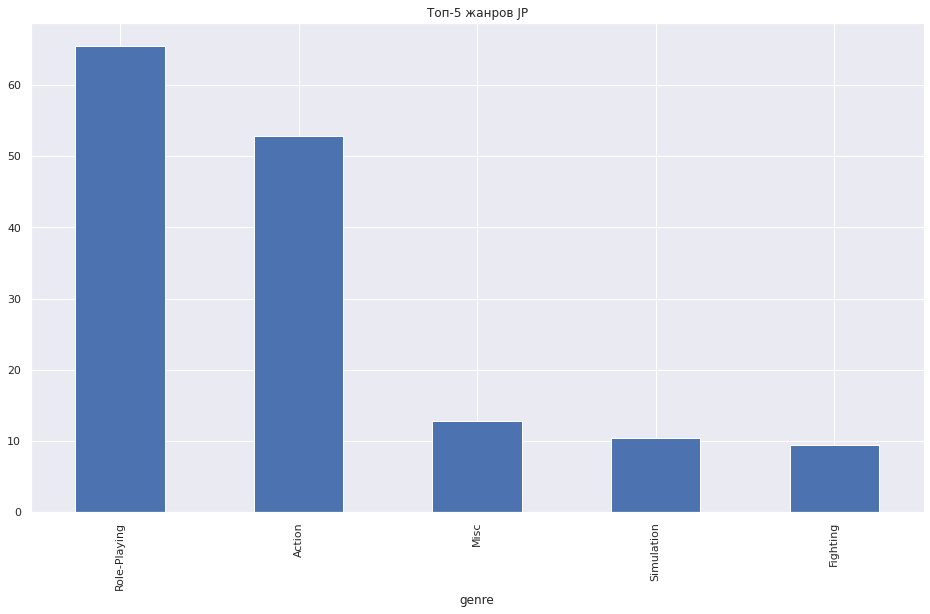

In [47]:
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='bar',title='Топ-5 жанров JP');

**Топ-5 жанров в Японии:**
1. Role-Playing
2. Action
3. Misc
4. Simulation
5. Fighting

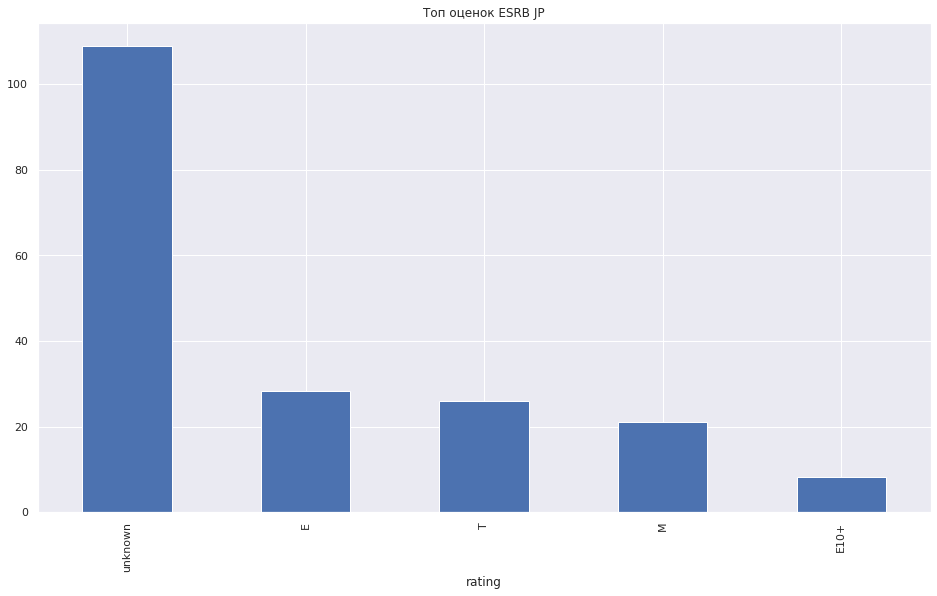

In [48]:
data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar',title='Топ оценок ESRB JP');

Странная особенность Японии в плане возрастных рейтингов - на 1 месте игры с неопределенным, пропущенным в датасете рейтингом. На втором месте - игры для всех, а на третьем - игры для подростков.

**Портрет пользователя из Японии** - человек, играющий на 3DS в игры role-play.

#### Сравнительная характеристика регионов

Первая отличительная черта между тремя регионами - объем продаж. В Северной Америке он в целом больше, чем в Европе, а в Европе больше, чем в Японии.

Судя по данным, рынок в Северной Америке и Европе достаточно близки, так как многие позиции топов сходятся. Японский рынок сильно отличается и от европейского, и от североамериканского. 

По платформам: в Северной Америке лидирует X360, в Европе - PS4, а в Японии - 3DS.

Жанровые топы в Северной Америке и Европе практически идентичны и в них лидируют экшен-игры. В Японии лидирует жанр role-playing.

Касательно возрастного рейтинга ESRB, в Северной Америке и Европе лидируют игры категории "mature" (для взрослых), а в Японии, по видимости, очень много игр не оценено ESRB (данные об оценках пропущены).


### Проверка гипотез

#### 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [49]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    data.query('(platform == "XOne")&(user_score!=-1)')['user_score'], 
    data.query('(platform == "PC")&(user_score!=-1)')['user_score'],
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


В результате проверки, не получилось отвергнуть нулевую гипотезу, что **средние пользовательские рейтинги платформ Xbox One и PC равны**

#### 

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны

In [50]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    data.query('(genre == "Action")&(user_score!=-1)')['user_score'], 
    data.query('(genre == "Sports")&(user_score!=-1)')['user_score'],
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


В результате проверки, отвергаем нулевую гипотезу и принимаем альтернативную о том, что **средние пользовательские рейтинги жанров Action и Sports не равны**

### Общий вывод

В результате исследования выяснилось, что **платформа находится на рынке в среднем 11 лет**. Причем, примерно **половину жизненного цикла** продажи платформы растут. Вместо 5,5 лет возьмем **5 лет**, так как данные представлены по годам, а не по полугодиям. Этим сроком будем определять **актуальный период**, который войдет в исследование (с 2012 по 2016 год). 

За последние годы суммарные продажи по платформам уменьшились по всем платформам. Несмотря на сильное падение по сравнению с 2015 годом, лидируют по продажам PS4, XOne и 3DS. **Перспективными можно назвать платформы PS4 и XOne, так как они самые новые и прибыльные одновременно.**

Медианные значения продаж на **XOne, X360 и PS4** достаточно близки. Также эти 3 платформы **выделяюся дороговизной игр** среди других.

На основе данных о трех популярных платформах, в случае с каждой платформой, между **оценками критиков и продажами** существует **слабая прямая взаимосвязь**, а между **оценками игроков и продажами** - **корреляции практически нет или взаимосвязь очень слабая**.

Как видно на диаграмме, **самый крупный** в количественном соотношении **жанр - экшен**, за ним следуют role-playing игры и приключенческие игры. **Менее всего представлены** симуляции, стратегии и **пазлы**.

**По медианным продажам лидирует** жанр шутеров, за ним следуют спортивные игры и игры-платформеры (несмотря на отсутствие в топе по количеству игр). 
**Хуже всего продаются** приключенческие игры, пазлы и стратегии.

Первая отличительная черта между **тремя регионами** - **объем продаж**. В **Северной Америке он в целом больше, чем в Европе, а в Европе больше, чем в Японии.**

Судя по данным, **рынки игр в Северной Америке и Европе достаточно близки**, так как многие позиции топов сходятся. **Японский рынок сильно отличается и от европейского, и от североамериканского.** 

**По платформам:** в Северной Америке лидирует X360, в Европе - PS4, а в Японии - 3DS.

**Жанровые топы в Северной Америке и Европе практически идентичны** и в них лидируют экшен-игры. В **Японии** лидирует жанр role-playing.

Касательно возрастного рейтинга **ESRB**, в Северной Америке и Европе **лидируют игры категории "mature" (для взрослых)**, а **в Японии**, по видимости, **очень много игр не оценено ESRB** (данные об оценках пропущены).

В результате проверки гипотез, принимаем гипотезу, что **средние пользовательские рейтинги платформ Xbox One и PC равны** и также принимаем гипотезу о том, что **средние пользовательские рейтинги жанров Action и Sports не равны**.

**Перспектива исследования**: обратить внимание и исследовать резкое сокращение числа популярных платформ в 2010-х годах, также стоит обратить внимание и исследовать общий спад продаж игр в течение последних лет.